In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,train_test_split
from keras.utils.vis_utils import plot_model

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(8693, 14) (4277, 13)


In [2]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
def CrossTabPlot(featureName): 
    crossTabResult = pd.crosstab(index=df_train[featureName],columns=df_train['Transported'], normalize='index')
    print(crossTabResult)
    crossTabResult.plot.bar()

def HistPlot(featureName):
    fig, ax1 = plt.subplots(figsize=(10, 7))
    sns.histplot(data = df_train, x=featureName, ax=ax1, bins=25, hue='Transported', kde=True)
    plt.show()

Transported     False      True
HomePlanet                     
Earth        0.576054  0.423946
Europa       0.341154  0.658846
Mars         0.476976  0.523024


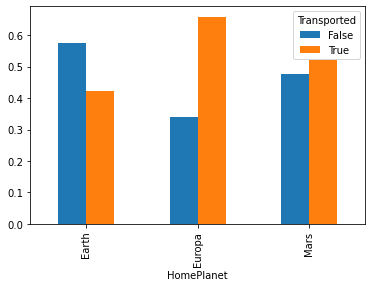

In [5]:
CrossTabPlot('HomePlanet')

Transported     False      True
CryoSleep                      
False        0.671079  0.328921
True         0.182417  0.817583


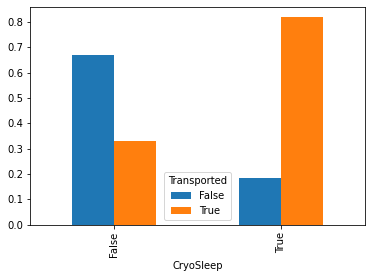

In [6]:
CrossTabPlot('CryoSleep')

Transported     False      True
Deck                           
A            0.503906  0.496094
B            0.265725  0.734275
C            0.319946  0.680054
D            0.566946  0.433054
E            0.642694  0.357306
F            0.560129  0.439871
G            0.483783  0.516217
T            0.800000  0.200000


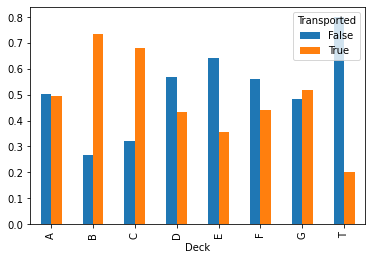

In [7]:
df_train['Deck'] = df_train['Cabin'].str.split('/',expand=True)[0]
df_test['Deck'] = df_test['Cabin'].str.split('/',expand=True)[0]
df_train['Deck'].unique()
CrossTabPlot('Deck')

Transported     False      True
Side                           
P            0.548740  0.451260
S            0.444963  0.555037


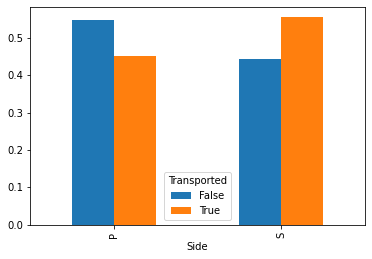

In [8]:
df_train['Side'] = df_train['Cabin'].str.split('/',expand=True)[2]
df_test['Side'] = df_test['Cabin'].str.split('/',expand=True)[2]
CrossTabPlot('Side')

In [9]:
df_train.drop('Cabin',axis=1, inplace= True)
df_test.drop('Cabin', axis=1, inplace= True)

In [10]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [11]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S


Transported       False      True
Destination                      
55 Cancri e    0.390000  0.610000
PSO J318.5-22  0.496231  0.503769
TRAPPIST-1e    0.528825  0.471175


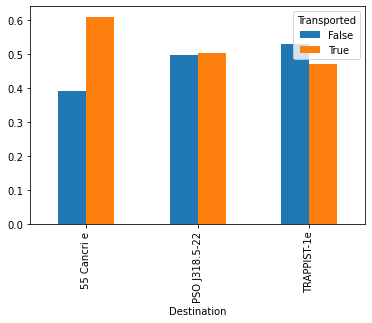

In [12]:
CrossTabPlot('Destination')

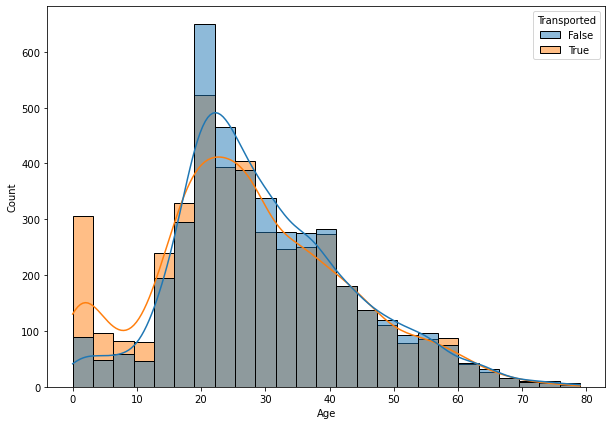

In [13]:
HistPlot('Age')

In [14]:
df_train.loc[df_train['Age'] < 17, 'Under17'] = True
df_train['Under17'].fillna(False, inplace = True)

df_test.loc[df_train['Age'] < 17, 'Under17'] = True
df_test['Under17'].fillna(False, inplace = True)

In [15]:
print(df_train.head())
print(df_train.head())

  PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False   
1        9.0          25.0   549.0    44.0       Juanna Vines         True   
2     3576.0           0.0  6715.0    49.0      Altark Susent        False   
3     1283.0         371.0  3329.0   193.0       Solam Susent        False   
4       70.0         151.0   565.0     2.0  Willy Santantines         True   

  Deck Side  Under17  
0    B    P    False  
1    F    S    False  

Transported     False      True
VIP                            
False        0.493668  0.506332
True         0.618090  0.381910


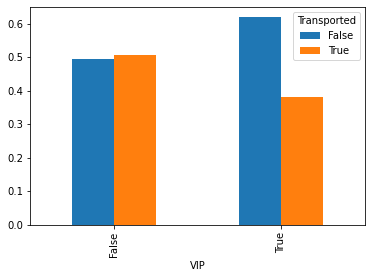

In [16]:
CrossTabPlot('VIP')

In [17]:
print(df_train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Side            199
Under17           0
dtype: int64


In [18]:
for column in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    df_train[column] = df_train[column].fillna(pd.Series(np.where(df_train['CryoSleep']==True,0,np.NaN)))
    df_test[column] = df_test[column].fillna(pd.Series(np.where(df_test['CryoSleep']==True,0,np.NaN)))

In [19]:
df_train['Passenger_Expense'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_test['Passenger_Expense'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

In [20]:
print(df_train.isnull().sum())

PassengerId            0
HomePlanet           201
CryoSleep            217
Destination          182
Age                  179
VIP                  203
RoomService          113
FoodCourt            113
ShoppingMall         112
Spa                  118
VRDeck               126
Name                 200
Transported            0
Deck                 199
Side                 199
Under17                0
Passenger_Expense    561
dtype: int64


In [21]:
input_features = ['HomePlanet','CryoSleep','Deck','Side','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Passenger_Expense', 'Under17']
y = df_train['Transported'].values
df_train = df_train[input_features]
print(y)

[False  True False ...  True False  True]


In [22]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

cat_features = df_train.select_dtypes(exclude="number").columns
num_features = df_train.select_dtypes(include="number").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_features),
        ("categorical", categorical_pipeline, cat_features),
    ]
)

In [23]:
df_train = preprocessor.fit_transform(df_train)
df_train_full = df_train.copy()

df_train, x_valid, y_train, y_valid = train_test_split(df_train_full, y, test_size = 0.2, random_state = 0)

In [24]:
input_shape = [df_train.shape[1]]
print(input_shape)
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1, activation = 'sigmoid'),
])

[25]


In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)


model_history = model.fit(
    df_train, y_train, 
    validation_data=(x_valid, y_valid),
    batch_size = 32, epochs = 100, verbose=True,
    callbacks=[early_stopping],
)

Epoch 1/100
218/218 [==============================] - 2s 4ms/step - loss: 0.5722 - accuracy: 0.7258 - val_loss: 0.4787 - val_accuracy: 0.7665
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.7551 - val_loss: 0.4405 - val_accuracy: 0.7734
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7715 - val_loss: 0.4396 - val_accuracy: 0.7625
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.7785 - val_loss: 0.4457 - val_accuracy: 0.7464
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4556 - accuracy: 0.7742 - val_loss: 0.4402 - val_accuracy: 0.7740
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7819 - val_loss: 0.4361 - val_accuracy: 0.7694
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7869 - val_loss: 0.4446 - val_accuracy: 0.7729

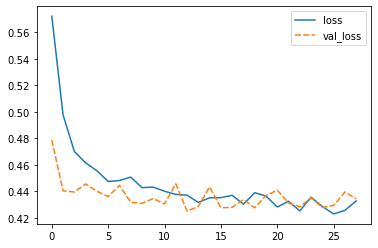

<AxesSubplot:>

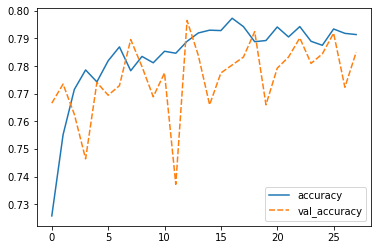

In [27]:
history_df = pd.DataFrame(model_history.history)
history_df.head()

sns.lineplot(data= history_df[['loss','val_loss']])
plt.show()
sns.lineplot(data= history_df[['accuracy','val_accuracy']])

In [28]:
_ = model.predict(df_train_full)
y_pred = list() 
for x in _:
    if x < 0.5: 
        y_pred.append(0)
    else: 
        y_pred.append(1) 

272/272 [==============================] - 0s 778us/step


<AxesSubplot:>

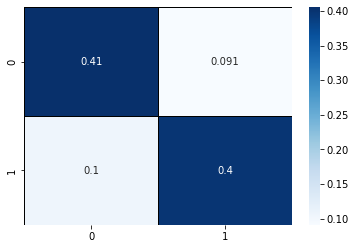

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred, normalize='all')
sns.heatmap(data= cm, cmap='Blues',linewidth=1, linecolor='black', annot=True)

In [30]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Side,Under17,Passenger_Expense
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S,False,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S,False,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S,False,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S,False,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S,True,645.0


In [31]:
PassengerIds = df_test['PassengerId']
df_test = df_test[input_features]
df_test = preprocessor.transform(df_test)

In [32]:
preds_test = model.predict(df_test) 
preds_test_str = []
for i in range(len(preds_test)):
    if preds_test[i] < 0.5:
        preds_test_str.append('False')
    else:
        preds_test_str.append('True')

output = pd.DataFrame({'PassengerId': PassengerIds,'Transported': preds_test_str})
output.to_csv('submission.csv', index=False)

134/134 [==============================] - 0s 772us/step


In [33]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
